In [2]:
%load_ext autoreload
%autoreload 2
from src.config import *
from scripts.__pull_price_data import *
from lstm import *
from dataloader import *
from src.backtest import *
s3 = S3Client()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
tester = LSTMTester()

2024-01-06 12:14:35,825 - src.backtest - INFO - Initializing dictionaries


In [14]:
tester.test(n_randoms=20)

/Users/lando/Projects/auctioneer/venv/lib/python3.10/site-packages/scipy/optimize/_optimize.py:404: RuntimeWarning: Values in x were outside bounds during a minimize step, clipping to bounds
  warnings.warn("Values in x were outside bounds during a "


LSTM Average: -0.6109772684675324
DCA Average: 2.4247167517210753
LSTM Median: -0.7960694467024241
DCA Median: 2.101420441925234
LSTM beats DCA in 1 out of 23 cases


In [15]:

tester_trades = []
for i in tester.trade_activity.values():
    for ii in i.values():
        for iii in ii:
            tester_trades.append(iii[1])
            
pd.Series(tester_trades).value_counts()

sell    1284
buy     1134
Name: count, dtype: int64

<Axes: >

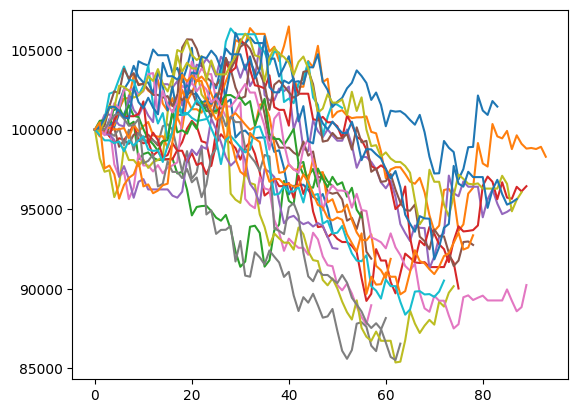

In [16]:
lstm_series_df = pd.DataFrame({key: val.reset_index(drop=True, inplace=False) for (key, val) in tester.lstm_values.items()})
lstm_series_df.plot(legend=False)

<Axes: >

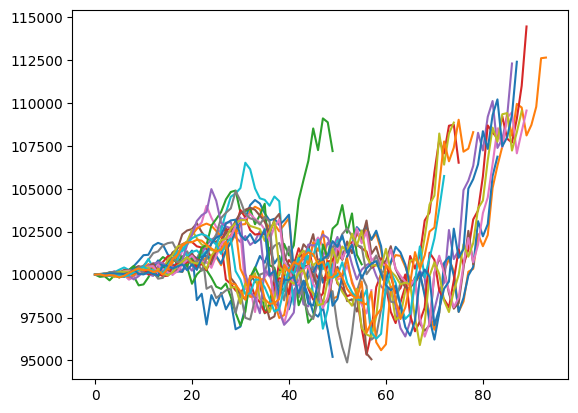

In [17]:
dca_series_df = pd.DataFrame({key: val.reset_index(drop=True, inplace=False) for (key, val) in tester.dca_values.items()})
dca_series_df.plot(legend=False)
